In [35]:
# All modules/libraries needed
import pandas as pd 
import hashlib as hl
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('Data/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [37]:
aus_data = df[df['NOC'] == 'AUS']
aus_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7638 entries, 274 to 269946
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      7638 non-null   int64  
 1   Name    7638 non-null   object 
 2   Sex     7638 non-null   object 
 3   Age     7527 non-null   float64
 4   Height  6739 non-null   float64
 5   Weight  6637 non-null   float64
 6   Team    7638 non-null   object 
 7   NOC     7638 non-null   object 
 8   Games   7638 non-null   object 
 9   Year    7638 non-null   int64  
 10  Season  7638 non-null   object 
 11  City    7638 non-null   object 
 12  Sport   7638 non-null   object 
 13  Event   7638 non-null   object 
 14  Medal   1320 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 954.8+ KB


In [38]:
annonymous_name = df['Name'].apply(lambda x: hl.sha256(x.encode()).hexdigest())

# Insert a new columns at index 1 on the table.
df.insert(1, "Annonymous Name", annonymous_name)
df.head(1)

,ID,Annonymous Name,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,3a4eef48434c66b3f14ab0221f6762d0ef7c6135ab2790...,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


#### Visualisera de sporter landet fått flest medaljer i

We will visualize:
- Top 5 sports with most medals
- All sports with more than 1000 medals

In [39]:
# Group the sports and count resp. medals on ecah sport
grouped_sport = aus_data.groupby("Sport", observed=True)[["Medal"]]
medal_count = grouped_sport.count()
medal_count

,Medal
Sport,
Alpine Skiing,1
Alpinism,1
Archery,5
Art Competitions,0
Athletics,89
Badminton,0
Baseball,24
Basketball,60
Beach Volleyball,4


In [40]:
# Get top 5 sports with most medals
sorted_medals = medal_count.sort_values(["Medal"], ascending=False)
sorted_medals.head(3)

,Medal
Sport,
Swimming,401
Hockey,188
Rowing,144


In [41]:
# I know that top 3 has 100+ medals, therefore filtering all > 100

top_3_sport = medal_count.loc[medal_count["Medal"] > 100]
top_3_sport

,Medal
Sport,
Hockey,188
Rowing,144
Swimming,401


In [42]:
medal_count_top_3 = top_3_sport["Medal"]
medal_count_top_3

Sport
Hockey      188
Rowing      144
Swimming    401
Name: Medal, dtype: int64

In [43]:
# Get all sport with 100 medals and below excluding the top 3 sports
filter_sport_above_1000_medals = medal_count[(medal_count["Medal"] <= 100) & (medal_count["Medal"] > 20)]
sorted = filter_sport_above_1000_medals.sort_values(["Medal"], ascending=False)
sports = sorted

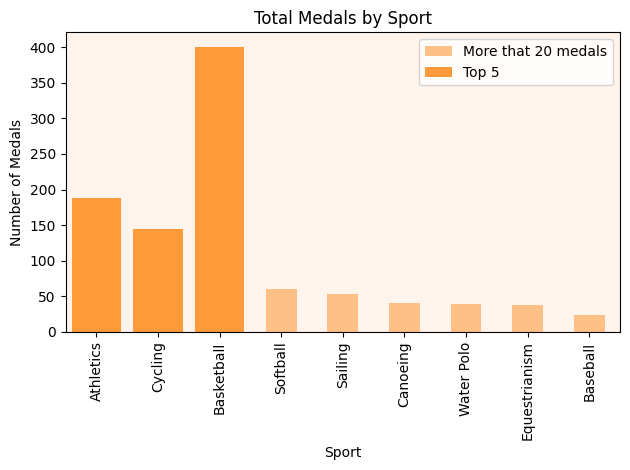

In [44]:
sports.plot(kind="bar", color="#FFC085")
plt.title("Total Medals by Sport")
plt.xlabel("Sport")
plt.ylabel("Number of Medals")

# Highlight the top 3 sport with the most medals
plt.bar(top_3_sport.index, medal_count_top_3, color="#FF9A3B")
plt.gca().set_facecolor("#FFF4EB")
plt.legend(labels=["More that 20 medals", "Top 5"])
plt.tight_layout()
plt.show()

#### Visualisera antal medaljer per OS

- There are some rows that has 'NaN' values and needs to process

In [59]:
aus_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
274,143,"Desmond ""Des"" Abbott",M,21.0,184.0,87.0,Australia,AUS,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Men's Hockey,Bronze
453,252,Youcef Abdi,M,30.0,178.0,66.0,Australia,AUS,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
454,252,Youcef Abdi,M,34.0,178.0,66.0,Australia,AUS,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
470,257,Ali Abdo,M,19.0,169.0,74.0,Australia,AUS,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Welterweight, Greco-Roman",NaN
471,257,Ali Abdo,M,23.0,169.0,74.0,Australia,AUS,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Middleweight, Freestyle",NaN


In [61]:
# Filter to only get Medal that is NOT 'NaN'
medals_df = aus_data[aus_data["Medal"].notna()]
medals_df.info()

"""Now we got all 1'320 rows which has gotten a medal(s)"""

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 274 to 267157
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1320 non-null   int64  
 1   Name    1320 non-null   object 
 2   Sex     1320 non-null   object 
 3   Age     1315 non-null   float64
 4   Height  1229 non-null   float64
 5   Weight  1209 non-null   float64
 6   Team    1320 non-null   object 
 7   NOC     1320 non-null   object 
 8   Games   1320 non-null   object 
 9   Year    1320 non-null   int64  
 10  Season  1320 non-null   object 
 11  City    1320 non-null   object 
 12  Sport   1320 non-null   object 
 13  Event   1320 non-null   object 
 14  Medal   1320 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 165.0+ KB


"Now we got all 1'320 rows which has gotten a medal(s)"

In [ ]:
# This part is just to visualize for better understanding the next cell
!medals_per_os = medals_df.groupby(["Games", "Medal"]).size()
!medals_per_os.head()

Games        Medal 
1896 Summer  Bronze    1
             Gold      2
1900 Summer  Bronze    3
             Gold      3
1904 Summer  Bronze    1
dtype: int64

Source:
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html
- https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/

In [80]:
# unstack "Medal" index and convert it into columns
medals_per_os = medals_df.groupby(["Games", "Medal"]).size().unstack(level=1, fill_value=0)
# level 0 = "Games", level 1 = "Medal"
# fill_value=0 fills the rows with 0 if there are still 'NaN'
medals_per_os.head()

Medal,Bronze,Gold,Silver
Games,,,
1896 Summer,1,2,0
1900 Summer,3,3,0
1904 Summer,1,0,3
1906 Summer,3,0,0
1920 Summer,1,0,6


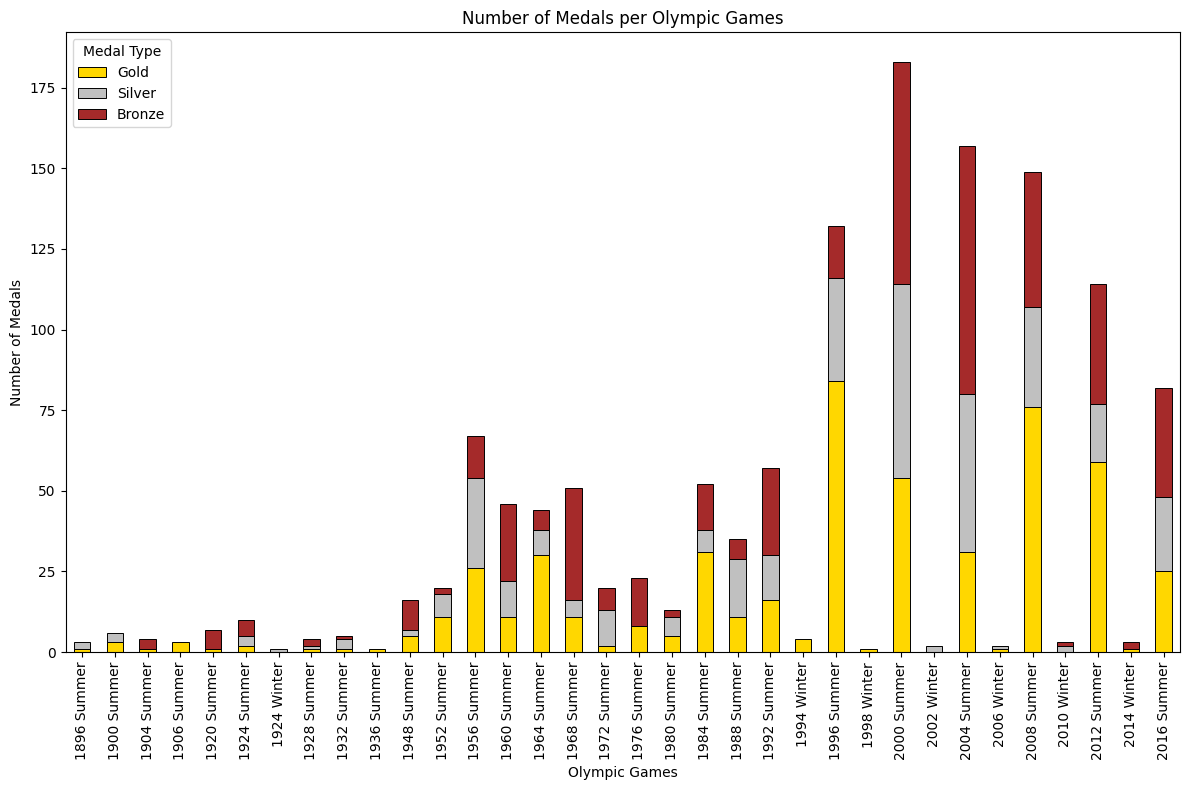

In [81]:
medals_per_os.plot(kind="bar", stacked=True, figsize=(12, 8), color=["gold", "silver", "brown"], edgecolor="black", linewidth=0.7)

plt.title("Number of Medals per Olympic Games")
plt.xlabel("Olympic Games")
plt.ylabel("Number of Medals")
plt.legend(loc="upper left", title="Medal Type", labels=["Gold", "Silver", "Bronze"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()